In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [2]:
plt.rcParams['font.family'] = 'Latin Modern Roman'
plt.rcParams.update({'font.size': 10})
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['xtick.labelsize'] = 12;
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['xtick.major.size'] = 10;
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 2;
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['xtick.minor.size'] = 5;
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1;
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['xtick.direction'] = 'in';
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
params = {'mathtext.default': 'regular'}
plt.rcParams.update(params)
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['ytick.right']=True
plt.rcParams['xtick.top']=True

In [3]:
def powerlawplot(m,c,x):
    Y=m*x+c
    return Y

In [15]:
def radio_plot(data,izdata,x,y,ymax,ymin,ysfr):
    fig1,axs1=plt.subplots(1,3,sharey=True)
    fig1.subplots_adjust(wspace=0)
    fig1.set_figheight(5)
    fig1.set_figwidth(15)
    SI=data['Spectral Index']
    cmap=plt.get_cmap('brg')
    cmap.set_bad('black')
    radioLum=data['Radio Luminosity (L_solar)']*3.846e33
    
    axs1[0].scatter(data['Mass 100pc'],radioLum,c=SI,cmap=cmap,plotnonfinite=True)
    #axs1[0].errorbar(data['Mass 100pc'],data['Radio Flux (Jy)'],yerr=data['Radio Flux Uncertainty (Jy)'],xerr=data['Mass 100pc Error'],fmt='None',ecolor='black',zorder=0)
    #axs1[0].scatter(10**izdata['log(Mdense) Msol'],izdata['Radio Flux'],marker='s',c='grey')
    #axs1[0].plot(x,10**y[0],color='orange')
    #axs1[0].fill_between(x,10**ymax[0],10**ymin[0],color='blue',alpha=0.1)
    #axs1[0].plot(x,10**ysfr[0],color='black')
    axs1[0].set_yscale('log')
    axs1[0].set_xscale('log')
    axs1[0].set_xlabel('$M_{H2, 100pc} (M_{\odot})$')
    axs1[0].set_ylabel('1.4 GHz Flux (Jy)')
    
    axs1[1].scatter(data['Mass 75pc'],radioLum,c=SI,cmap=cmap,plotnonfinite=True)
    #axs1[1].errorbar(data['Mass 75pc'],data['Radio Flux (Jy)'],yerr=data['Radio Flux Uncertainty (Jy)'],xerr=data['Mass 75pc Error'],fmt='None',ecolor='black',zorder=0)
    #axs1[1].plot(x,10**y[1],color='orange')
    #axs1[1].fill_between(x,10**ymax[1],10**ymin[1],color='blue',alpha=0.1)
    #axs1[1].plot(x,10**ysfr[1],color='black')
    axs1[1].set_yscale('log')
    axs1[1].set_xscale('log')
    axs1[1].set_xlabel('$M_{H2, 75pc} (M_{\odot})$')
    
    
    im=axs1[2].scatter(data['Mass 50pc'],radioLum,c=SI,cmap=cmap,plotnonfinite=True)
    #axs1[2].errorbar(data['Mass 50pc'],data['Radio Flux (Jy)'],yerr=data['Radio Flux Uncertainty (Jy)'],xerr=data['Mass 50pc Error'],fmt='None',ecolor='black',zorder=0)
    #axs1[2].plot(x,10**y[2],color='orange')
    #axs1[2].fill_between(x,10**ymax[2],10**ymin[2],color='blue',alpha=0.1)
    #axs1[2].plot(x,10**ysfr[2],color='black')
    axs1[2].set_yscale('log')
    axs1[2].set_xscale('log')
    axs1[2].set_xlabel('$M_{H2, 50pc} (M_{\odot})$')
    
    cbar_ax=fig1.add_axes([0.25,0,0.5,0.05])
    fig1.subplots_adjust(bottom=0.2)
    fig1.colorbar(im,cax=cbar_ax,label='mm Spectral Index',orientation='horizontal')

In [16]:
def mm_plot(data,x,y100,y50,y200):
    fig1,axs1=plt.subplots(1,3,sharey=True)
    fig1.subplots_adjust(wspace=0)
    fig1.set_figheight(5)
    fig1.set_figwidth(15)
    dect=data[data['Detection']=='Yes']
    nodect=data[data['Detection']=='No']
    dectmm=dect[dect['mm']=='Yes']
    dectnomm=dect[dect['mm']=='No']
    SI=dectmm['Spectral Index']
    cmap=plt.get_cmap('brg')
    cmap.set_bad('black')
    
    axs1[0].scatter(dectmm['Mass 100pc'],dectmm['1mm flux density (Jy)'],c=SI,cmap=cmap,plotnonfinite=True)
    axs1[0].errorbar(dectmm['Mass 100pc'],dectmm['1mm flux density (Jy)'],yerr=dectmm['RMS'],xerr=dectmm['Mass 100pc Error'],fmt='None',ecolor='black',zorder=0)
    axs1[0].scatter(nodect['Mass 100pc'],nodect['1mm flux density (Jy)'],marker='v',c='grey')
    axs1[0].errorbar(nodect['Mass 100pc'],nodect['1mm flux density (Jy)'],yerr=nodect['RMS'],xerr=nodect['Mass 100pc Error'],fmt='None',ecolor='black',zorder=0)
    axs1[0].scatter(dectnomm['Mass 100pc'], dectnomm['1mm flux density (Jy)'],marker='s',c=['crimson','black'])
    axs1[0].errorbar(dectnomm['Mass 100pc'],dectnomm['1mm flux density (Jy)'],yerr=dectnomm['RMS'],xerr=dectnomm['Mass 100pc Error'],fmt='None',ecolor='black',zorder=0)
    axs1[0].plot(x,10**y100[0],color='black',linestyle='dashed')
    axs1[0].plot(x,10**y50[0],color='blue',linestyle='dashed')
    axs1[0].plot(x,10**y200[0],color='red',linestyle='dashed')    
    axs1[0].set_yscale('log')
    axs1[0].set_xscale('log')
    axs1[0].set_xlabel('$M_{H2, 100pc} (M_{\odot})$')
    axs1[0].set_ylabel('1mm Flux Density (Jy)')
        
    axs1[1].scatter(dectmm['Mass 75pc'],dectmm['1mm flux density (Jy)'],c=SI,cmap=cmap,plotnonfinite=True)
    axs1[1].errorbar(dectmm['Mass 75pc'],dectmm['1mm flux density (Jy)'],yerr=dectmm['RMS'],xerr=dectmm['Mass 75pc Error'],fmt='None',ecolor='black',zorder=0)
    axs1[1].scatter(nodect['Mass 75pc'],nodect['1mm flux density (Jy)'],marker='v',c='grey')
    axs1[1].errorbar(nodect['Mass 75pc'],nodect['1mm flux density (Jy)'],yerr=nodect['RMS'],xerr=nodect['Mass 75pc Error'],fmt='None',ecolor='black',zorder=0)
    axs1[1].scatter(dectnomm['Mass 75pc'], dectnomm['1mm flux density (Jy)'],marker='s',c=['crimson','black'])
    axs1[1].errorbar(dectnomm['Mass 75pc'],dectnomm['1mm flux density (Jy)'],yerr=dectnomm['RMS'],xerr=dectnomm['Mass 75pc Error'],fmt='None',ecolor='black',zorder=0)
    axs1[1].plot(x,10**y100[1],color='black',linestyle='dashed')
    axs1[1].plot(x,10**y50[1],color='blue',linestyle='dashed')
    axs1[1].plot(x,10**y200[1],color='red',linestyle='dashed')    
    axs1[1].set_yscale('log')
    axs1[1].set_xscale('log')
    axs1[1].set_xlabel('$M_{H2, 75pc} (M_{\odot})$')   
    
    
    im=axs1[2].scatter(dectmm['Mass 50pc'],dectmm['1mm flux density (Jy)'],c=SI,cmap=cmap,plotnonfinite=True)
    axs1[2].errorbar(dectmm['Mass 50pc'],dectmm['1mm flux density (Jy)'],yerr=dectmm['RMS'],xerr=dectmm['Mass 50pc Error'],fmt='None',ecolor='black',zorder=0)
    axs1[2].scatter(nodect['Mass 50pc'],nodect['1mm flux density (Jy)'],marker='v',c='grey')
    axs1[2].errorbar(nodect['Mass 50pc'],nodect['1mm flux density (Jy)'],yerr=nodect['RMS'],xerr=nodect['Mass 50pc Error'],fmt='None',ecolor='black',zorder=0)
    axs1[2].scatter(dectnomm['Mass 50pc'], dectnomm['1mm flux density (Jy)'],marker='s',c=['crimson','black'])
    axs1[2].errorbar(dectnomm['Mass 50pc'],dectnomm['1mm flux density (Jy)'],yerr=dectnomm['RMS'],xerr=dectnomm['Mass 50pc Error'],fmt='None',ecolor='black',zorder=0)
    axs1[2].plot(x,10**y100[2],color='black',linestyle='dashed')
    axs1[2].plot(x,10**y50[2],color='blue',linestyle='dashed')
    axs1[2].plot(x,10**y200[2],color='red',linestyle='dashed')    
    axs1[2].set_yscale('log')
    axs1[2].set_xscale('log')
    axs1[2].set_xlabel('$M_{H2, 50pc} (M_{\odot})$')
    
    cbar_ax=fig1.add_axes([0.25,0,0.5,0.05])
    fig1.subplots_adjust(bottom=0.2)
    fig1.colorbar(im,cax=cbar_ax,label='mm Spectral Index',orientation='horizontal')

In [17]:
def xray_plot(data,izdata):
    fig1,axs1=plt.subplots(1,3,sharey=True)
    fig1.subplots_adjust(wspace=0)
    fig1.set_figheight(5)
    fig1.set_figwidth(15)
    SI=data['Spectral Index']
    cmap=plt.get_cmap('brg')
    cmap.set_bad('black')
    xray=data['Adjusted X-ray Luminosity (Lsolar)']*3.846e33
    xray_err=(data['Adjusted X-ray Flux Uncertainty']/data['Adjusted X-ray Flux (Jy)'])*xray
    
    axs1[0].scatter(data['Mass 100pc'],xray,c=SI,cmap=cmap,plotnonfinite=True)
    axs1[0].errorbar(data['Mass 100pc'],xray,yerr=xray_err,xerr=data['Mass 100pc Error'],fmt='None',ecolor='black',zorder=0)
    #axs1[0].scatter(10**izdata['log(Mdense) Msol'],10**izdata['log(L(2-10) )(erg/s)'],marker='s',c='grey')
    axs1[0].set_yscale('log')
    axs1[0].set_xscale('log')
    axs1[0].set_xlabel('$M_{H2, 100pc} (M_{\odot})$')
    axs1[0].set_ylabel('X-ray Luminosity (ergs/s)')
    
    axs1[1].scatter(data['Mass 75pc'],xray,c=SI,cmap=cmap,plotnonfinite=True)
    axs1[1].errorbar(data['Mass 75pc'],xray,yerr=xray_err,xerr=data['Mass 75pc Error'],fmt='None',ecolor='black',zorder=0)
    axs1[1].set_yscale('log')
    axs1[1].set_xscale('log')
    axs1[1].set_xlabel('$M_{H2, 75pc} (M_{\odot})$')
    
    
    im=axs1[2].scatter(data['Mass 50pc'],xray,c=SI,cmap=cmap,plotnonfinite=True)
    axs1[2].errorbar(data['Mass 50pc'],xray,yerr=xray_err,xerr=data['Mass 50pc Error'],fmt='None',ecolor='black',zorder=0)
    axs1[2].set_yscale('log')
    axs1[2].set_xscale('log')
    axs1[2].set_xlabel('$M_{H2, 50pc} (M_{\odot})$')
    
    cbar_ax=fig1.add_axes([0.25,0,0.5,0.05])
    fig1.subplots_adjust(bottom=0.2)
    fig1.colorbar(im,cax=cbar_ax,label='mm Spectral Index',orientation='horizontal')

In [18]:
def acc_rate(data,izdata,x,y):
    fig1,axs1=plt.subplots(1,3,sharey=True)
    fig1.subplots_adjust(wspace=0)
    fig1.set_figheight(5)
    fig1.set_figwidth(15)
    SI=data['Spectral Index']
    cmap=plt.get_cmap('brg')
    cmap.set_bad('black')
    
    axs1[0].scatter(data['Mass 100pc'],data['Accretion rate (M_solar/yr)'],c=SI,cmap=cmap,plotnonfinite=True)
    axs1[0].errorbar(data['Mass 100pc'],data['Accretion rate (M_solar/yr)'],yerr=data['Accretion Rate Error'],xerr=data['Mass 100pc Error'],fmt='None',ecolor='black',zorder=0)
    #axs1[0].scatter(data['Mass 100pc']*0.1,data['Accretion rate (M_solar/yr)'],marker='*',c=SI,cmap=cmap,plotnonfinite=True)
    #axs1[0].scatter(10**izdata['log(Mdense) Msol'],10**izdata['log(Mdot) (Msol/yr)'],marker='s',c='grey')
    axs1[0].plot(x,10**y,color='black',linestyle='dashed')
    axs1[0].set_yscale('log')
    axs1[0].set_xscale('log')
    axs1[0].set_xlabel('$M_{H2, 100pc} (M_{\odot})$')
    axs1[0].set_ylabel('Accretion rate ($M_{\odot} yr^{-1}$)')
    
    axs1[1].scatter(data['Mass 75pc'],data['Accretion rate (M_solar/yr)'],c=SI,cmap=cmap,plotnonfinite=True)
    axs1[1].errorbar(data['Mass 75pc'],data['Accretion rate (M_solar/yr)'],yerr=data['Accretion Rate Error'],xerr=data['Mass 75pc Error'],fmt='None',ecolor='black',zorder=0)
    axs1[1].set_yscale('log')
    axs1[1].set_xscale('log')
    axs1[1].set_xlabel('$M_{H2, 75pc} (M_{\odot})$')
    
    
    im=axs1[2].scatter(data['Mass 50pc'],data['Accretion rate (M_solar/yr)'],c=SI,cmap=cmap,plotnonfinite=True)
    axs1[2].errorbar(data['Mass 50pc'],data['Accretion rate (M_solar/yr)'],yerr=data['Accretion Rate Error'],xerr=data['Mass 50pc Error'],fmt='None',ecolor='black',zorder=0)
    axs1[2].set_yscale('log')
    axs1[2].set_xscale('log')
    axs1[2].set_xlabel('$M_{H2, 50pc} (M_{\odot})$') 
    
    cbar_ax=fig1.add_axes([0.25,0,0.5,0.05])
    fig1.subplots_adjust(bottom=0.2)
    fig1.colorbar(im,cax=cbar_ax,label='mm Spectral Index',orientation='horizontal')

In [19]:
data=pd.read_csv('Documents/Python.csv')
izumi=pd.read_csv('Documents/IzumiCND.csv')
int_data=izumi[izumi['Sample']=='Int']
x=np.logspace(5,9,100)
y100=powerlawplot(2.12,-17.56,np.log10(x))
y100max=powerlawplot(2.49,-14.49,np.log10(x))
y100min=powerlawplot(1.75,-20.63,np.log10(x))
y75=powerlawplot(2.36,-18.63,np.log10(x))
y75max=powerlawplot(2.69,-16.02,np.log10(x))
y75min=powerlawplot(2.03,-21.24,np.log10(x))
y50=powerlawplot(1.77,-13.62,np.log10(x))
y50max=powerlawplot(1.98,-12.02,np.log10(x))
y50min=powerlawplot(1.56,-15.22,np.log10(x))
Ysfr100=powerlawplot(0.28,-5.82,np.log10(x))
Ysfr75=powerlawplot(0.45,-7.14,np.log10(x))
Ysfr50=powerlawplot(0.42,-7.03,np.log10(x))

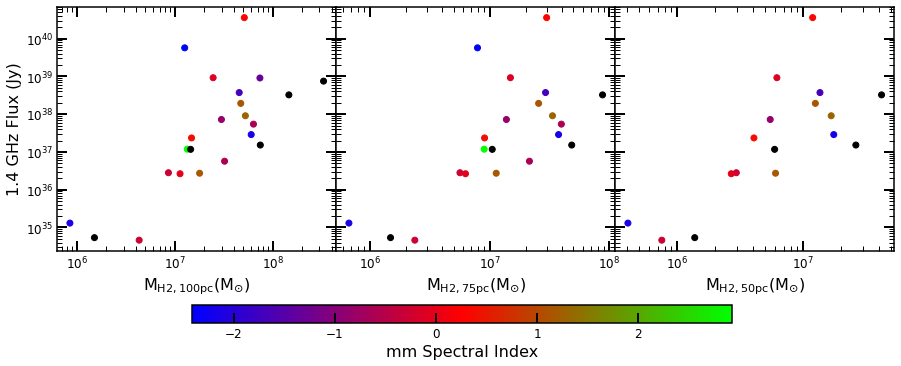

In [20]:
radio_plot(data,int_data,x,[y100,y75,y50],[y100max,y75max,y50max],[y100min,y75min,y50min],[Ysfr100,Ysfr75,Ysfr50])

In [10]:
ydust100=powerlawplot(0.27,-5.34,np.log10(x))
ydust75=powerlawplot(0.45,-6.66,np.log10(x))
ydust50=powerlawplot(0.42,-6.55,np.log10(x))
ydust100_50=powerlawplot(0.28,-5.04,np.log10(x))
ydust75_50=powerlawplot(0.45,-6.36,np.log10(x))
ydust50_50=powerlawplot(0.42,-6.25,np.log10(x))
ydust100_200=powerlawplot(0.27,-5.64,np.log10(x))
ydust75_200=powerlawplot(0.45,-6.96,np.log10(x))
ydust50_200=powerlawplot(0.42,-6.85,np.log10(x))

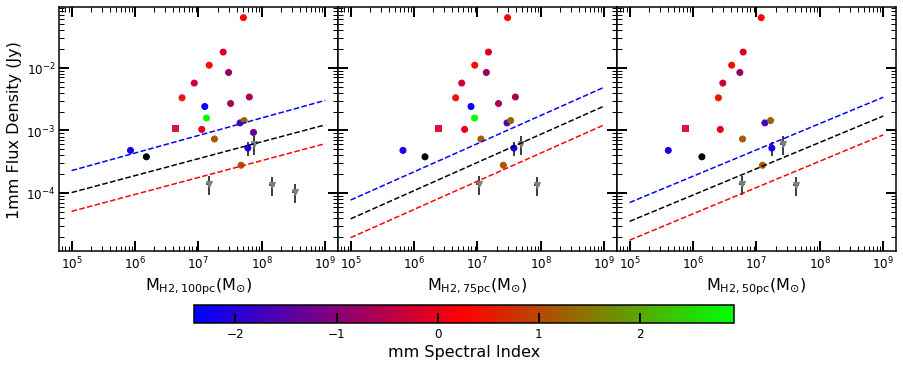

In [11]:
mm_plot(data,x,[ydust100,ydust75,ydust50],[ydust100_50,ydust75_50,ydust50_50],[ydust100_200,ydust75_200,ydust50_200])

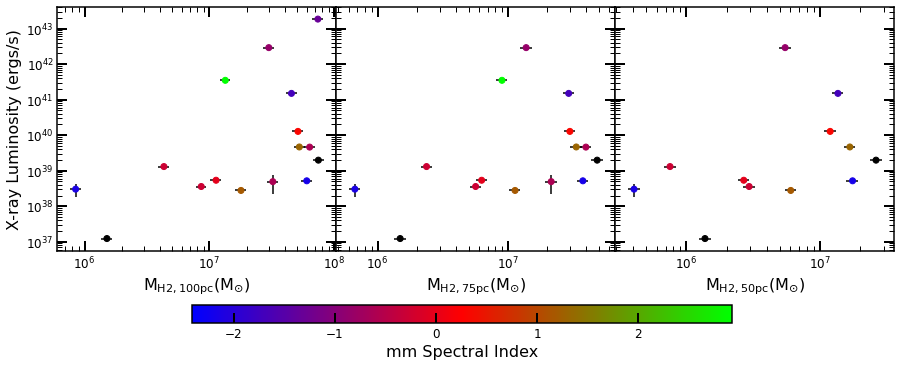

In [12]:
xray_plot(data,int_data)

In [13]:
izfit=powerlawplot(1.41,-13.45,np.log10(x))

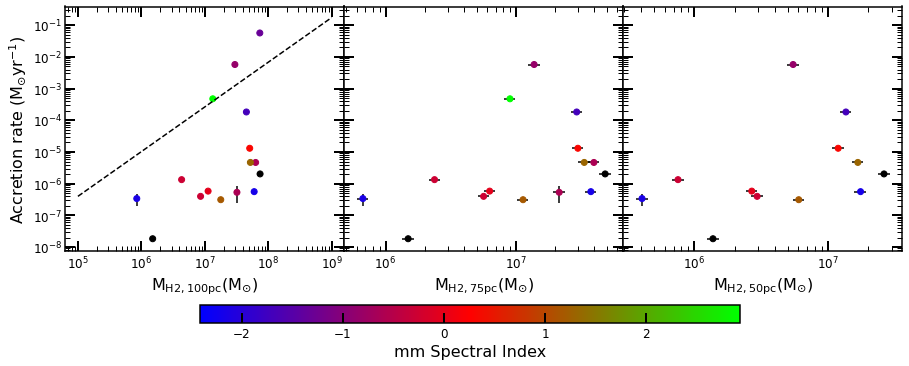

In [14]:
acc_rate(data,int_data,x,izfit)

In [15]:
def OIIIacc_rate(data):
    fig1,axs1=plt.subplots(1,3,sharey=True)
    fig1.subplots_adjust(wspace=0)
    fig1.set_figheight(5)
    fig1.set_figwidth(15)
    SI=data['Spectral Index']
    cmap=plt.get_cmap('brg')
    cmap.set_bad('black')
    
    axs1[0].scatter(data['Mass 100pc'],data['OIII Accretion rate'],c=SI,cmap=cmap,plotnonfinite=True)
    #axs1[0].errorbar(data['Mass 100pc'],data['Accretion rate (M_solar/yr)'],yerr=data['Accretion Rate Error'],xerr=data['Mass 100pc Error'],fmt='None',ecolor='black',zorder=0)
    #axs1[0].scatter(data['Mass 100pc']*0.1,data['Accretion rate (M_solar/yr)'],marker='*',c=SI,cmap=cmap,plotnonfinite=True)
    #axs1[0].scatter(10**izdata['log(Mdense) Msol'],10**izdata['log(Mdot) (Msol/yr)'],marker='s',c='grey')
    #axs1[0].plot(x,10**y,color='black',linestyle='dashed')
    axs1[0].set_yscale('log')
    axs1[0].set_xscale('log')
    axs1[0].set_xlabel('$M_{H2, 100pc} (M_{\odot})$')
    axs1[0].set_ylabel('[OIII] Accretion rate ($M_{\odot} yr^{-1}$)')
    
    axs1[1].scatter(data['Mass 75pc'],data['OIII Accretion rate'],c=SI,cmap=cmap,plotnonfinite=True)
    #axs1[1].errorbar(data['Mass 75pc'],data['Accretion rate (M_solar/yr)'],yerr=data['Accretion Rate Error'],xerr=data['Mass 75pc Error'],fmt='None',ecolor='black',zorder=0)
    axs1[1].set_yscale('log')
    axs1[1].set_xscale('log')
    axs1[1].set_xlabel('$M_{H2, 75pc} (M_{\odot})$')
    
    
    im=axs1[2].scatter(data['Mass 50pc'],data['OIII Accretion rate'],c=SI,cmap=cmap,plotnonfinite=True)
    #axs1[2].errorbar(data['Mass 50pc'],data['Accretion rate (M_solar/yr)'],yerr=data['Accretion Rate Error'],xerr=data['Mass 50pc Error'],fmt='None',ecolor='black',zorder=0)
    axs1[2].set_yscale('log')
    axs1[2].set_xscale('log')
    axs1[2].set_xlabel('$M_{H2, 50pc} (M_{\odot})$') 
    
    cbar_ax=fig1.add_axes([0.25,0,0.5,0.05])
    fig1.subplots_adjust(bottom=0.2)
    fig1.colorbar(im,cax=cbar_ax,label='mm Spectral Index',orientation='horizontal')

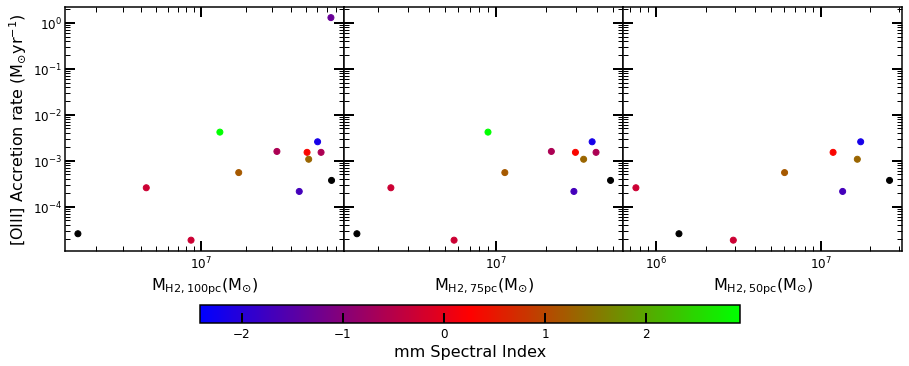

In [16]:
OIIIacc_rate(data)